# Log Gaussian 2D

`lamatrix` provides a log Gaussian to fit to data in 2D. You should read through the `lnGaussian` example before reading this one to see some of the caveats. This model expands to two dimensions, but has the same caveats. Keep in mind for now this does not implement the $\rho$ correlation term in this 2D Gaussian. Below is a derivation of the 2D case of a log Gaussian.

$$
G(x, y) = A \frac{1}{2 \pi \sigma_x \sigma_y} \exp ^{\left( -\frac{(x - \mu_x)^2}{2\sigma_x^2} - \frac{(y - \mu_y)^2}{2\sigma_y^2} \right)}
$$

$$
\ln G(x, y) = \ln(A) -\ln(2 \pi \sigma_x \sigma_y) - \frac{x^2}{2\sigma_x^2} + \frac{x\mu_x}{\sigma_x^2} - \frac{\mu_x^2}{2\sigma_x^2} - \frac{y^2}{2\sigma_y^2} + \frac{y\mu_y}{\sigma_y^2} - \frac{\mu_y^2}{2\sigma_y^2}
$$


$$
a_x = - \frac{1}{2\sigma_x^2}
$$
$$
b_x = \frac{\mu_x}{\sigma_x^2}
$$

$$
a_y = - \frac{1}{2\sigma_y^2}
$$
$$
b_y = \frac{\mu_y}{\sigma_y^2}
$$
$$
c = \ln(A) - \ln(2\pi\sigma_x\sigma_y) - \frac{\mu_x^2}{2\sigma_x^2} - \frac{\mu_y^2}{2\sigma_y^2}
$$

$$
\ln(G(x)) = a_x x^2 + b_x x + a_y y^2 + b_y y + c
$$


Let's look at the equation for this model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X, Y = np.mgrid[-10:10:200j,-9:9:180j]


from lamatrix import lnGaussian2D

In [2]:
model = lnGaussian2D()

In [3]:
model.equation

'\\[f(\\mathbf{y}, \\mathbf{x}) = w_{0} x^2 + w_{1} x + w_{2} y^2 + w_{3} y + w_{4} \\]'

Just like in the case of the 1D log Gaussian, you are able to add priors to this object.

In [4]:
lnGaussian2D(prior_A=(10, 0.1), prior_mu_x=(0, 0.1), prior_sigma_x=(1, 0.1), prior_mu_y=(0, 0.1), prior_sigma_y=(2, 0.1))

lnGaussian2D(y, x)[n, 5]

Let's create some fake data to fit

In [5]:
from lamatrix import Gaussian2D

X, Y = np.mgrid[-10:10:100j,-9:9:99j]
A, mu_x, sigma_x, mu_y, sigma_y = 10, -0.5, 1.5, 2, 1
truth = Gaussian2D(sigma_x=sigma_x, mu_x=mu_x, sigma_y=sigma_y, mu_y=mu_y)(x=X, y=Y).dot([A]) 
data = truth + np.random.normal(0, 0.01, size=X.shape)
errors = np.ones_like(X) * 0.01

Below we fit the data. As in the 1D example, we clip out any data points that are within errors of being 0.

In [6]:
model = lnGaussian2D()
k = data > 5*errors
model.fit(x=X[k], y=Y[k], data=np.log(data[k]), errors=errors[k]/data[k])

Below we plot the best fit

[Text(0.5, 0, '$x$'), Text(0.5, 1.0, 'Best Fit')]

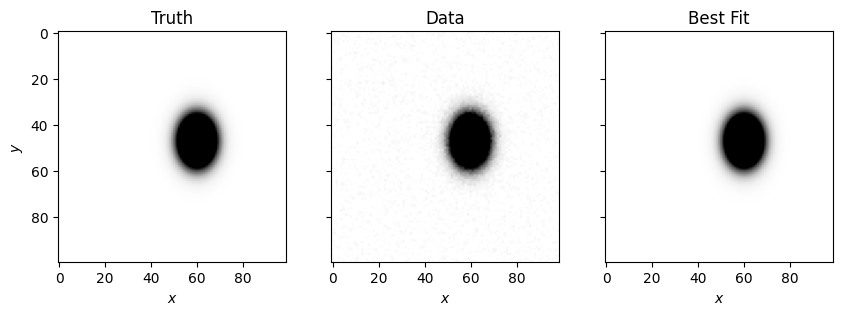

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True)
ax[0].imshow(truth, cmap='Greys', vmin=0, vmax=0.3)
ax[1].imshow(data, cmap='Greys', vmin=0, vmax=0.3)
ax[2].imshow(np.exp(model.evaluate(x=X, y=Y)), cmap='Greys', vmin=0, vmax=0.3)
ax[0].set(xlabel='$x$', ylabel='$y$', title='Truth')
ax[1].set(xlabel='$x$', title='Data')
ax[2].set(xlabel='$x$', title='Best Fit')

And we can show the best fit parameters

In [8]:
model.coefficients_to_gaussian_parameters(model.posteriors)

DistributionContainer
	[(10.04, 0.16), (-0.4993, 0.0025), (1.5032, 0.0018), (2.0001, 0.007), (1.0045, 0.0012)]

These are within errors of our inputs!